### National Basketball Association

#### 2016 - 2017 season

In [137]:
import os,re
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns',200)
pd.set_option("display.max_rows",500)

In [138]:
dfNba = pd.read_csv("../../text_files/sbro/nba/nba_2016_sbro_massey_tr.txt")

In [139]:
dfNba.columns.tolist()

['date',
 'team1',
 'team1 encode',
 'team1 ha',
 'team1 ha encode',
 'team1 1st quarter',
 'team1 2nd quarter',
 'team1 3rd quarter',
 'team1 4th quarter',
 'team1 final score',
 'team1 game result',
 'team1 game result encode',
 'team1 open spread',
 'team1 open spread result',
 'team1 open spread result encode',
 'team1 close spread',
 'team1 close spread result',
 'team1 close spread result encode',
 'team1 american odds',
 'team1 probability odds',
 'team1 decimal odds',
 'team1 fractional odds',
 'team1 win',
 'team1 loss',
 'team1 record rating',
 'team1 rating rank',
 'team1 rating rating',
 'team1 power rank',
 'team1 power rating',
 'team1 offense rank',
 'team1 offense rating',
 'team1 defense rank',
 'team1 defense rating',
 'team1 home field advantage',
 'team1 schedule rank number',
 'team1 schedule rank decimal',
 'team1 conference',
 'team1 conference encode',
 'team1 assists',
 'team1 defensive rebounds',
 'team1 field goals attempted',
 'team1 fouls',
 'team1 offensiv

In [140]:
dfNba.head(50)

,date,team1,team1 encode,team1 ha,team1 ha encode,team1 1st quarter,team1 2nd quarter,team1 3rd quarter,team1 4th quarter,team1 final score,team1 game result,team1 game result encode,team1 open spread,team1 open spread result,team1 open spread result encode,team1 close spread,team1 close spread result,team1 close spread result encode,team1 american odds,team1 probability odds,team1 decimal odds,team1 fractional odds,team1 win,team1 loss,team1 record rating,team1 rating rank,team1 rating rating,team1 power rank,team1 power rating,team1 offense rank,team1 offense rating,team1 defense rank,team1 defense rating,team1 home field advantage,team1 schedule rank number,team1 schedule rank decimal,team1 conference,team1 conference encode,team1 assists,team1 defensive rebounds,team1 field goals attempted,team1 fouls,team1 offensive rebounds,team1 opponent points,team1 points,team1 last 3 points,team1 last 1 points,team1 home points,team1 away points,team1 scoring margin,team1 last 3 scoring margin,team1 last 1 scoring margin,team1 home scoring margin,team1 away scoring margin,team1 three pointers attempted,team2,team2 encode,team2 ha,team2 ha encode,team2 1st quarter,team2 2nd quarter,team2 3rd quarter,team2 4th quarter,team2 final score,team2 game result,team2 game result encode,team2 open spread,team2 open spread result,team2 open spread result encode,team2 close spread,team2 close spread result,team2 close spread result encode,team2 american odds,team2 probability odds,team2 decimal odds,team2 fractional odds,team2 win,team2 loss,team2 record rating,team2 rating rank,team2 rating rating,team2 power rank,team2 power rating,team2 offense rank,team2 offense rating,team2 defense rank,team2 defense rating,team2 home field advantage,team2 schedule rank number,team2 schedule rank decimal,team2 conference,team2 conference encode,team2 assists,team2 defensive rebounds,team2 field goals attempted,team2 fouls,team2 offensive rebounds,team2 opponent points,team2 points,team2 last 3 points,team2 last 1 points,team2 home points,team2 away points,team2 scoring margin,team2 last 3 scoring margin,team2 last 1 scoring margin,team2 home scoring margin,team2 away scoring margin,team2 three pointers attempted,open total,open total result,open total result encode,close total,close total result,close total result encode,year
0,1025,New York Knicks,20,away,0,18,27,19,24,88,loss,0,9.5,loss,0,9.0,loss,0,355,21.98,4.55,3.5500,31,51,0.378,25,-0.91,25,-4.41,19,103.70,22,-2.52,2.77,26,0.42,atlantic,1,21.8,33.2,88.5,20.3,12.0,108.0,104.3,99.7,114,104.9,103.8,-3.7,-8.3,1,-1.6,-5.8,24.7,Cleveland Cavaliers,6,home,1,28,20,34,35,117,win,1,-9.5,win,1,-9.0,win,1,-450,81.82,1.22,0.2222,64,36,0.640,2,1.70,2,8.45,2,114.86,18,-0.82,2.71,5,1.52,central,2,22.6,34.1,84.6,18.2,9.3,107.4,111.4,123.3,120,113.4,109.4,4.0,2.3,-9,8.2,0.1,33.9,205.5,under,0,206.0,under,0,2016
1,1025,Utah Jazz,29,away,0,26,20,37,21,104,loss,0,6.0,loss,0,5.5,loss,0,195,33.90,2.95,1.9500,55,38,0.591,5,0.78,6,3.74,29,100.01,1,9.32,2.24,1,1.90,northwest,3,20.1,33.7,79.3,19.1,9.1,97.5,100.4,96.7,95,100.8,100.0,2.9,-16.0,-26,4.8,1.1,25.9,Portland Trailblazers,25,home,1,26,28,23,36,113,win,1,-6.0,win,1,-5.5,win,1,-235,70.15,1.43,0.4255,41,45,0.477,14,-0.07,14,0.19,8,106.97,20,-1.19,3.03,4,1.55,northwest,3,20.9,33.6,86.2,21.2,10.1,109.0,107.6,99.0,103,109.8,105.4,-1.3,-20.0,-25,2.2,-4.9,28.0,194.0,over,1,192.0,over,1,2016
2,1025,San Antonio Spurs,27,away,0,31,33,33,32,129,win,1,8.0,win,1,8.0,win,1,325,23.53,4.25,3.2500,69,29,0.704,3,1.23,3,6.50,10,106.69,2,5.41,2.85,2,1.74,southwest,6,23.4,33.5,84.2,18.3,10.5,99.4,105.6,107.7,115,106.3,105.0,6.2,-20.7,-14,7.5,4.9,23.7,Golden State Warriors,10,home,1,20,26,31,23,100,loss,0,-8.0,loss,0,-8.0,loss,0,-400,80.00,1.25,0.2500,83,16,0.838,1,3.54,1,15.71,1,119.68,11,1.62,2.99,3,1.58,pacific,4,30.0,35.3,87.1,19.7,9.4,104.5,116.5,121.0,129,118.9,114.0,12.0,-2.3,9,16.1,7.7,31.5,210.5,over,1,212.0,over,1,2016
3,1026,Miami Heat,16,away,0,23,27,30,28,108,win,1,4.0,win,1,3.0,w

### Parsing dates

In [141]:
def parseDate(df):
    for index,x in enumerate(df["date"]):
        if (int(x) > 900 and int(x) <= 1231 and len(str(x)) == 4):
            month = str(x)[:2]
            day = str(x)[2:]
            df["date"].iloc[index] = month + "/" + day + "/" + "2016"
            print("changed: %s" % df["date"].iloc[index])
        # following year from January to June
        elif (int(x) < 900):
            month = str(x)[:1]
            day = str(x)[1:]
            
            df["date"].iloc[index] = month + "/" + day + "/" + "2017"
            
    # return df

In [142]:
parseDate(dfNba).tail(50)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


changed: 10/25/2016
changed: 10/25/2016
changed: 10/25/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/27/2016
changed: 10/27/2016
changed: 10/27/2016
changed: 10/27/2016
changed: 10/28/2016
changed: 10/28/2016
changed: 10/28/2016
changed: 10/28/2016
changed: 10/28/2016
changed: 10/28/2016
changed: 10/28/2016
changed: 10/28/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/30/2016
changed: 10/30/2016
changed: 10/30/2016
changed: 10/30/2016
changed: 10/30/2016
changed: 10/30/2016
changed: 10/30/2016
changed: 10/31/2016
changed: 10/31/2016
changed: 10/31/2016
changed: 10/31/2016
changed: 11/01/2016
changed: 11/01/2016
changed: 11/01/2016
changed: 11/01/2016
changed: 11/01/2016


AttributeError: 'NoneType' object has no attribute 'tail'

In [ ]:
dfNba.tail(50)

### Change to date time index

In [143]:
dfNba["date"] = pd.to_datetime(dfNba["date"],format="%m/%d/%Y")
# dfNba["date"] = dfNba["date"].apply(pd.to_datetime(format="%m/%d/%Y"))
# dfNba.set_index("date",inplace=True)
# dfNba.dtypes
dfNba.head(15)

,date,team1,team1 encode,team1 ha,team1 ha encode,team1 1st quarter,team1 2nd quarter,team1 3rd quarter,team1 4th quarter,team1 final score,team1 game result,team1 game result encode,team1 open spread,team1 open spread result,team1 open spread result encode,team1 close spread,team1 close spread result,team1 close spread result encode,team1 american odds,team1 probability odds,team1 decimal odds,team1 fractional odds,team1 win,team1 loss,team1 record rating,team1 rating rank,team1 rating rating,team1 power rank,team1 power rating,team1 offense rank,team1 offense rating,team1 defense rank,team1 defense rating,team1 home field advantage,team1 schedule rank number,team1 schedule rank decimal,team1 conference,team1 conference encode,team1 assists,team1 defensive rebounds,team1 field goals attempted,team1 fouls,team1 offensive rebounds,team1 opponent points,team1 points,team1 last 3 points,team1 last 1 points,team1 home points,team1 away points,team1 scoring margin,team1 last 3 scoring margin,team1 last 1 scoring margin,team1 home scoring margin,team1 away scoring margin,team1 three pointers attempted,team2,team2 encode,team2 ha,team2 ha encode,team2 1st quarter,team2 2nd quarter,team2 3rd quarter,team2 4th quarter,team2 final score,team2 game result,team2 game result encode,team2 open spread,team2 open spread result,team2 open spread result encode,team2 close spread,team2 close spread result,team2 close spread result encode,team2 american odds,team2 probability odds,team2 decimal odds,team2 fractional odds,team2 win,team2 loss,team2 record rating,team2 rating rank,team2 rating rating,team2 power rank,team2 power rating,team2 offense rank,team2 offense rating,team2 defense rank,team2 defense rating,team2 home field advantage,team2 schedule rank number,team2 schedule rank decimal,team2 conference,team2 conference encode,team2 assists,team2 defensive rebounds,team2 field goals attempted,team2 fouls,team2 offensive rebounds,team2 opponent points,team2 points,team2 last 3 points,team2 last 1 points,team2 home points,team2 away points,team2 scoring margin,team2 last 3 scoring margin,team2 last 1 scoring margin,team2 home scoring margin,team2 away scoring margin,team2 three pointers attempted,open total,open total result,open total result encode,close total,close total result,close total result encode,year
0,2016-10-25,New York Knicks,20,away,0,18,27,19,24,88,loss,0,9.5,loss,0,9.0,loss,0,355,21.98,4.55,3.5500,31,51,0.378,25,-0.91,25,-4.41,19,103.70,22,-2.52,2.77,26,0.42,atlantic,1,21.8,33.2,88.5,20.3,12.0,108.0,104.3,99.7,114,104.9,103.8,-3.7,-8.3,1,-1.6,-5.8,24.7,Cleveland Cavaliers,6,home,1,28,20,34,35,117,win,1,-9.5,win,1,-9.0,win,1,-450,81.82,1.22,0.2222,64,36,0.640,2,1.70,2,8.45,2,114.86,18,-0.82,2.71,5,1.52,central,2,22.6,34.1,84.6,18.2,9.3,107.4,111.4,123.3,120,113.4,109.4,4.0,2.3,-9,8.2,0.1,33.9,205.5,under,0,206.0,under,0,2016
1,2016-10-25,Utah Jazz,29,away,0,26,20,37,21,104,loss,0,6.0,loss,0,5.5,loss,0,195,33.90,2.95,1.9500,55,38,0.591,5,0.78,6,3.74,29,100.01,1,9.32,2.24,1,1.90,northwest,3,20.1,33.7,79.3,19.1,9.1,97.5,100.4,96.7,95,100.8,100.0,2.9,-16.0,-26,4.8,1.1,25.9,Portland Trailblazers,25,home,1,26,28,23,36,113,win,1,-6.0,win,1,-5.5,win,1,-235,70.15,1.43,0.4255,41,45,0.477,14,-0.07,14,0.19,8,106.97,20,-1.19,3.03,4,1.55,northwest,3,20.9,33.6,86.2,21.2,10.1,109.0,107.6,99.0,103,109.8,105.4,-1.3,-20.0,-25,2.2,-4.9,28.0,194.0,over,1,192.0,over,1,2016
2,2016-10-25,San Antonio Spurs,27,away,0,31,33,33,32,129,win,1,8.0,win,1,8.0,win,1,325,23.53,4.25,3.2500,69,29,0.704,3,1.23,3,6.50,10,106.69,2,5.41,2.85,2,1.74,southwest,6,23.4,33.5,84.2,18.3,10.5,99.4,105.6,107.7,115,106.3,105.0,6.2,-20.7,-14,7.5,4.9,23.7,Golden State Warriors,10,home,1,20,26,31,23,100,loss,0,-8.0,loss,0,-8.0,loss,0,-400,80.00,1.25,0.2500,83,16,0.838,1,3.54,1,15.71,1,119.68,11,1.62,2.99,3,1.58,pacific,4,30.0,35.3,87.1,19.7,9.4,104.5,116.5,121.0,129,118.9,114.0,12.0,-2.3,9,16.1,7.7,31.5,210.5,over,1,212.0,over,1,2016
3,2016-10-26,Miami Heat,16,away,0,23,27,30,28,1

### Restrict target

In [144]:
dfFilterNba = dfNba[(dfNba["team1 final score"] > 60) & (dfNba["team2 final score"] > 60) \
    & (dfNba["team1 decimal odds"] < 25)]

In [145]:
# dallasDf["Date"] = pd.to_datetime(dallasDf['Date'])
# dallasDf.set_index('Date',inplace=True)
# dallasDf.index

In [146]:
features = [
    # 'date',
    # 'team1',
    # 'team1 ha',
    # 'team1 1st quarter',
    # 'team1 2nd quarter',
    # 'team1 3rd quarter',
    # 'team1 4th quarter',
    # 'team1 final score',
    # 'team1 game result',
    # 'team1 game result encode',
    # 'team1 open spread result',
    # 'team1 open spread result encode',
    'team1 close spread',
    # 'team1 close spread result',
    # 'team1 close spread result encode',
    'team1 american odds',
    'team1 probability odds',
    'team1 decimal odds',
    'team1 fractional odds',
    'team1 loss',
    'team1 power rank',
    'team1 offense rank',
    'team1 schedule rank number',
    'team1 schedule rank decimal',
    # 'team1 conference',
    'team1 defensive rebounds',
    'team1 offensive rebounds',
    'team1 opponent points',
    'team1 points',
    'team1 home points',
    'team1 scoring margin',
    'team1 last 1 scoring margin',
    # 'team2',
    'team2 encode',
    # 'team2 ha',
    # 'team2 1st quarter',
    # 'team2 2nd quarter',
    # 'team2 3rd quarter',
    # 'team2 4th quarter',
    # 'team2 final score',
    # 'team2 game result',
    # 'team2 game result encode',
    # 'team2 open spread result',
    # 'team2 open spread result encode',
    'team2 close spread',
    # 'team2 close spread result',
    # 'team2 close spread result encode',
    'team2 probability odds',
    'team2 decimal odds',
    'team2 fractional odds',
    'team2 win',
    'team2 loss',
    'team2 rating rank',
    'team2 rating rating',
    'team2 power rank',
    'team2 power rating',
    'team2 offense rating',
    'team2 home field advantage',
    'team2 schedule rank number',
    'team2 schedule rank decimal',
    # 'team2 conference',
    'team2 conference encode',
    'team2 defensive rebounds',
    'team2 field goals attempted',
    'team2 opponent points',
    'team2 points',
    'team2 last 3 points',
    'team2 away points',
    'team2 scoring margin',
    'team2 last 1 scoring margin',
    'team2 away scoring margin',
    'open total',
    'close total']

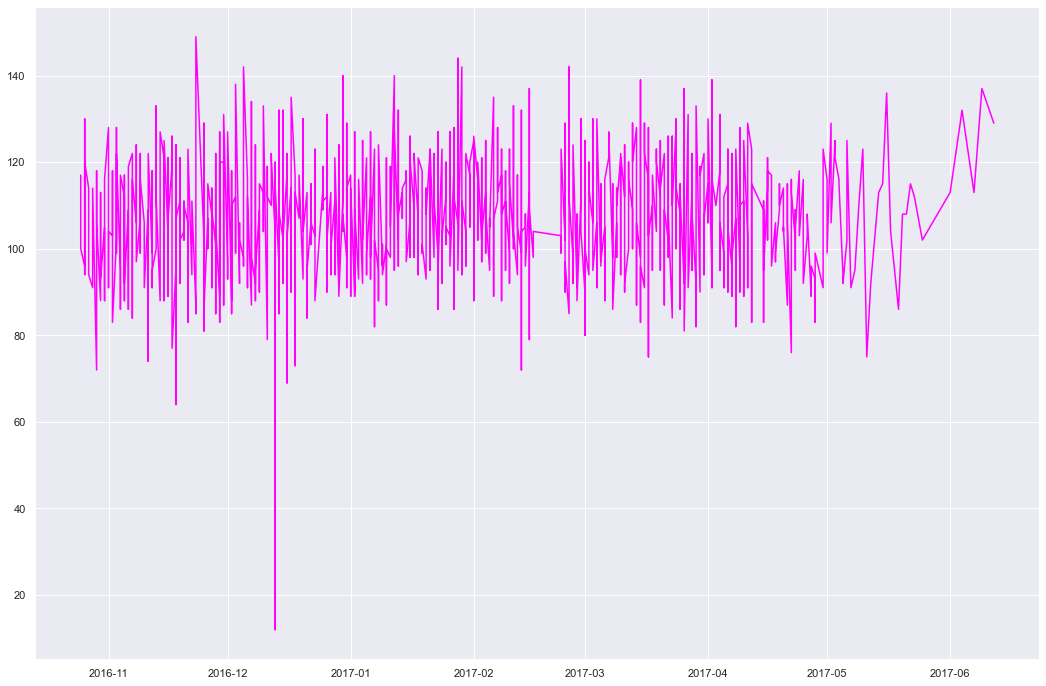

In [147]:
plt.figure(figsize=(18,12))
# plt.plot(nbaDf.index,nbaDf["team1 final score"],color="green")
plt.plot(dfNba.date,dfNba["team2 final score"],color="magenta")
plt.show()

In [152]:
dfNbaScore = dfNba[(dfNba["team1 final score"] > 60) & (dfNba["team2 final score"] > 60) \
    & (dfNba["team1 decimal odds"] < 25)]

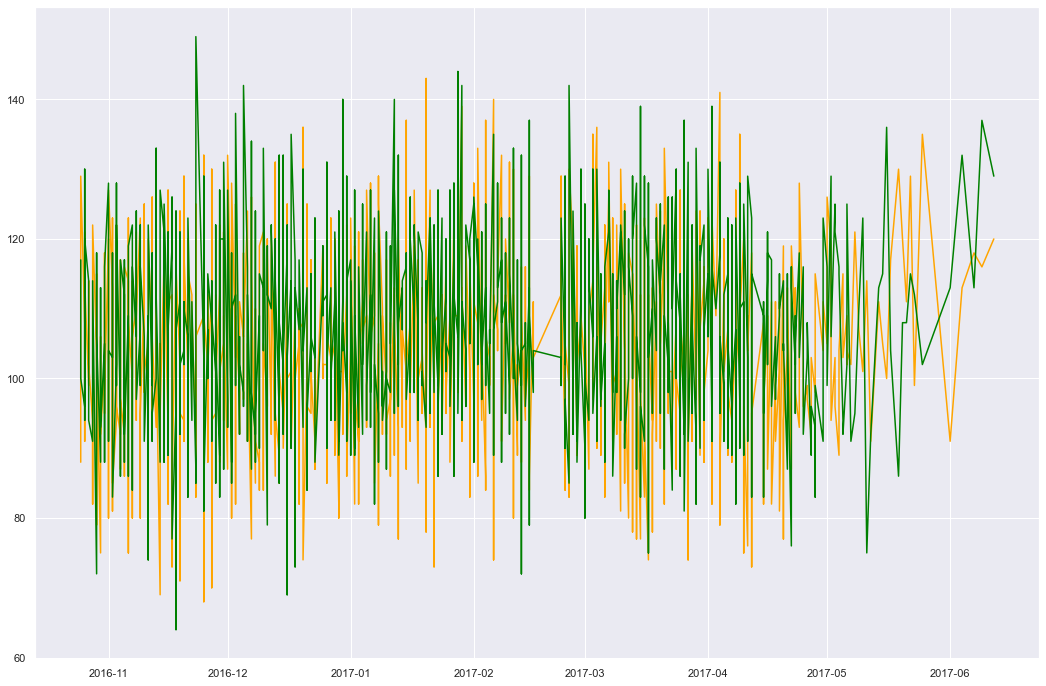

In [153]:
plt.figure(figsize=(18,12))
plt.plot(dfNbaScore.date,dfNbaScore["team1 final score"],color="orange")
plt.plot(dfNbaScore.date,dfNbaScore["team2 final score"],color="green")
plt.show()

### Decimal odds

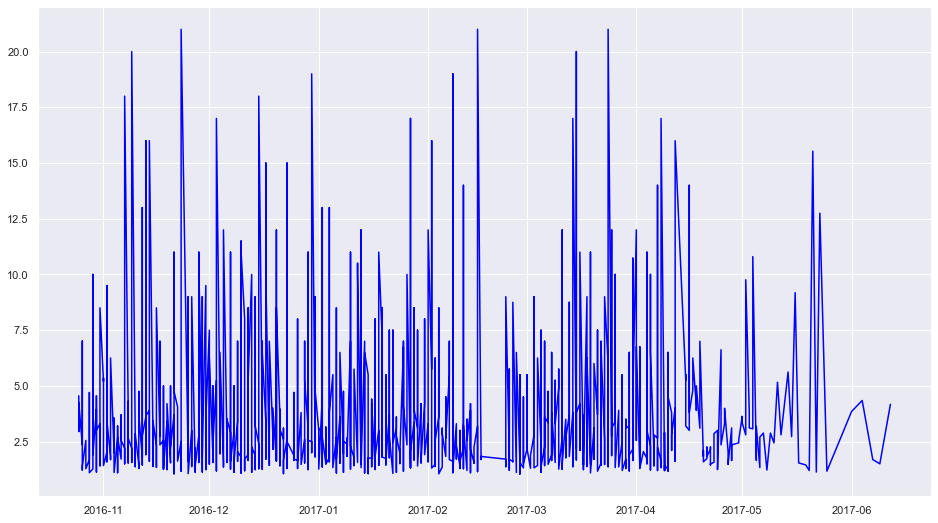

In [158]:
plt.figure(figsize=(16,9))
plt.plot(dfNbaScore.date,dfNbaScore["team1 decimal odds"],color="blue")
plt.show()

### Train, test, & split

#### Target team one final score

In [159]:
xTrain,xTest,yTrain,yTest = train_test_split(dfFilterNba[features],dfFilterNba["team1 final score"], \
    test_size=0.25,random_state=14)

xTestCopy = xTest.copy(deep=True)

In [160]:
# scale data
scalerX = StandardScaler()
scalerX.fit(xTrain)
xTrainScaled = scalerX.transform(xTrain)
xTestScaled = scalerX.transform(xTest)

In [161]:
XGBRegressor = xgb.XGBRegressor(booster="gbtree",objective="reg:squarederror",learning_rate=0.9111,
    max_depth=6,alpha=1,n_estimators=211,reg_lambda=0.09999,reg_alpha=2.2222)

In [162]:
XGBRegressor.fit(xTrainScaled,yTrain)

XGBRegressor(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.9111, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=211, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=2.2222, reg_lambda=0.09999, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [163]:
yPredict = XGBRegressor.predict(xTestScaled)
pd.DataFrame(yPredict).head(255)

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


,0
0,109.386131
1,104.084335
2,96.322845
3,94.359009
4,111.326981
5,100.271011
6,104.235802
7,113.046944
8,88.448112
9,104.696930


In [164]:
xTestCopy.reset_index(inplace=True)
xTestCopy.head(25)

,index,team1 close spread,team1 american odds,team1 probability odds,team1 decimal odds,team1 fractional odds,team1 loss,team1 power rank,team1 offense rank,team1 schedule rank number,team1 schedule rank decimal,team1 defensive rebounds,team1 offensive rebounds,team1 opponent points,team1 points,team1 home points,team1 scoring margin,team1 last 1 scoring margin,team2 encode,team2 close spread,team2 probability odds,team2 decimal odds,team2 fractional odds,team2 win,team2 loss,team2 rating rank,team2 rating rating,team2 power rank,team2 power rating,team2 offense rating,team2 home field advantage,team2 schedule rank number,team2 schedule rank decimal,team2 conference encode,team2 defensive rebounds,team2 field goals attempted,team2 opponent points,team2 points,team2 last 3 points,team2 away points,team2 scoring margin,team2 last 1 scoring margin,team2 away scoring margin,open total,close total
0,877,5.0,185,35.09,2.85,1.8500,45,14,8,4,1.55,33.6,10.1,109.0,107.6,109.8,-1.3,-25,28,-5.0,68.25,1.47,0.4651,55,37,9,0.35,10,0.85,102.89,2.69,19,0.69,1,32.6,83.8,102.6,105.8,99.7,101.7,3.1,-7,-0.4,212.5,208.0
1,603,11.5,550,15.38,6.50,5.5000,53,29,24,27,0.37,33.3,9.8,107.6,101.1,100.2,-6.6,4,29,-11.5,88.89,1.12,0.1250,55,38,5,0.78,6,3.74,100.01,2.24,1,1.90,3,33.7,79.3,97.5,100.4,96.7,100.0,2.9,-26,1.1,194.0,194.5
2,446,4.5,165,37.74,2.65,1.6500,41,8,18,25,0.42,33.0,10.6,102.1,103.2,106.5,1.1,8,19,-4.5,64.91,1.54,0.5405,34,48,19,-0.36,20,-1.52,104.77,2.95,12,0.96,6,35.1,87.0,106.4,104.3,100.0,101.0,-2.1,3,-4.8,203.0,206.0
3,726,9.5,425,19.05,5.25,4.2500,39,13,14,9,1.27,34.2,12.2,106.2,106.5,109.7,0.2,-6,27,-9.5,84.62,1.18,0.1818,69,29,3,1.23,3,6.50,106.69,2.85,2,1.74,6,33.5,84.2,99.4,105.6,107.7,105.0,6.2,-14,4.9,210.0,210.0
4,551,6.0,220,31.25,3.20,2.2000,48,20,16,12,0.96,35.1,8.6,106.4,104.3,107.6,-2.1,3,2,-6.0,72.22,1.38,0.3846,62,38,7,0.61,7,1.89,106.81,2.33,15,0.88,1,32.1,84.9,105.9,107.5,104.0,105.6,1.6,-33,0.8,214.5,212.5
5,280,0.0,-110,52.38,1.91,0.9091,53,29,24,27,0.37,33.3,9.8,107.6,101.1,100.2,-6.6,4,23,0.0,52.38,1.91,0.9091,28,54,27,-1.05,27,-5.85,103.33,2.71,28,0.36,1,33.0,85.3,108.1,102.4,102.0,102.5,-5.7,-1,-7.8,196.0,198.5
6,168,5.0,175,36.36,2.75,1.7500,51,25,19,26,0.42,33.2,12.0,108.0,104.3,104.9,-3.7,1,30,-5.0,66.67,1.50,0.5000,56,39,8,0.47,12,0.68,109.45,3.61,30,0.24,5,32.5,87.1,107.5,109.0,99.3,107.8,1.6,-10,-2.5,205.5,208.5
7,1220,13.5,1000,9.09,11.00,10.0000,44,16,28,21,0.53,31.5,8.8,103.1,102.9,104.9,-0.2,-3,2,-13.5,95.24,1.05,0.0500,62,38,7,0.61,7,1.89,106.81,2.33,15,0.88,1,32.1,84.9,105.9,107.5,104.0,105.6,1.6,-33,0.8,207.0,205.0
8,1177,4.5,165,37.74,2.65,1.6500,41,8,18,25,0.42,33.0,10.6,102.1,103.2,106.5,1.1,8,28,-4.5,64.91,1.54,0.5405,55,37,9,0.35,10,0.85,102.89,2.69,19,0.69,1,32.6,83.8,102.6,105.8,99.7,101.7,3.1,-7,-0.4,207.5,207.5
9,273,7.5,250,28.57,3.50,2.5000,44,11,13,20,0.59,32.8,9.2,105.7,105.3,107.0,-0.4,-4,25,-7.5,75.90,1.32,0.3175,41,45,14,-0.07,14,0.19,106.97,3.03,4,1.55,3,33.6,86.2,109.0,107.6,99.0,105.4,-1.3,-25,-4.9,215.0,209.0


In [165]:
xTestCopy["team1 final score predict"] = ""
for index,row in enumerate(range(0,len(xTestCopy),1)):
    # print(index)
    xTestCopy["team1 final score predict"].iloc[index] = pd.DataFrame(yPredict).iloc[index,0]
    


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [166]:
xTestCopy.tail(50)

,index,team1 close spread,team1 american odds,team1 probability odds,team1 decimal odds,team1 fractional odds,team1 loss,team1 power rank,team1 offense rank,team1 schedule rank number,team1 schedule rank decimal,team1 defensive rebounds,team1 offensive rebounds,team1 opponent points,team1 points,team1 home points,team1 scoring margin,team1 last 1 scoring margin,team2 encode,team2 close spread,team2 probability odds,team2 decimal odds,team2 fractional odds,team2 win,team2 loss,team2 rating rank,team2 rating rating,team2 power rank,team2 power rating,team2 offense rating,team2 home field advantage,team2 schedule rank number,team2 schedule rank decimal,team2 conference encode,team2 defensive rebounds,team2 field goals attempted,team2 opponent points,team2 points,team2 last 3 points,team2 away points,team2 scoring margin,team2 last 1 scoring margin,team2 away scoring margin,open total,close total,team1 final score predict
277,625,5.5,200,33.33,3.00,2.0000,45,14,8,4,1.55,33.6,10.1,109.0,107.6,109.8,-1.3,-25,4,-5.5,70.59,1.42,0.4167,36,46,21,-0.45,17,-1.06,104.34,2.87,22,0.48,5,34.8,85.4,104.7,104.9,89.7,103.2,0.2,-27,-2.8,216.5,217.5,108.403465
278,1194,-9.0,-500,83.33,1.20,0.2000,37,10,21,19,0.69,32.6,10.2,102.6,105.8,109.8,3.1,-7,20,9.0,20.00,5.00,4.0000,31,51,25,-0.91,25,-4.41,103.70,2.77,26,0.42,1,33.2,88.5,108.0,104.3,99.7,103.8,-3.7,1,-5.8,203.0,201.0,105.073326
279,80,-12.0,-1000,90.91,1.10,0.1000,36,2,2,5,1.52,34.1,9.3,107.4,111.4,113.4,4.0,-9,23,12.0,12.50,8.00,7.0000,28,54,27,-1.05,27,-5.85,103.33,2.71,28,0.36,1,33.0,85.3,108.1,102.4,102.0,102.5,-5.7,-1,-7.8,204.5,210.0,100.627449
280,35,-11.5,-791,88.78,1.13,0.1264,16,1,1,3,1.58,35.3,9.4,104.5,116.5,118.9,12.0,9,24,11.5,14.93,6.70,5.7000,24,58,29,-1.34,28,-6.01,107.98,2.98,13,0.96,4,33.1,88.5,113.3,107.7,116.0,105.8,-5.6,-25,-8.7,225.0,227.0,111.235664
281,176,9.5,400,20.00,5.00,4.0000,62,30,11,23,0.43,35.1,8.8,112.5,105.8,104.4,-6.7,-39,21,-9.5,83.33,1.20,0.2000,48,39,12,0.11,13,0.32,105.48,3.19,9,1.27,3,34.2,87.4,106.2,106.5,107.7,103.3,0.2,-6,-5.1,218.0,216.5,118.396355
282,29,8.0,280,26.32,3.80,2.8000,62,30,11,23,0.43,35.1,8.8,112.5,105.8,104.4,-6.7,-39,17,-8.0,78.26,1.28,0.2778,44,44,16,-0.17,16,-0.70,100.77,2.73,21,0.53,2,31.5,81.6,103.1,102.9,86.0,100.9,-0.2,-3,-3.1,206.0,205.0,102.889641
283,1284,-6.5,-285,74.03,1.35,0.3509,36,2,2,5,1.52,34.1,9.3,107.4,111.4,113.4,4.0,-9,28,6.5,29.94,3.34,2.3400,55,37,9,0.35,10,0.85,102.89,2.69,19,0.69,1,32.6,83.8,102.6,105.8,99.7,101.7,3.1,-7,-0.4,209.0,209.0,112.103394
284,1227,13.5,700,12.50,8.00,7.0000,56,26,15,14,0.94,32.1,11.4,111.5,104.6,107.6,-6.9,-15,10,-13.5,91.67,1.09,0.0909,83,16,1,3.54,1,15.71,119.68,2.99,3,1.58,4,35.3,87.1,104.5,116.5,121.0,114.0,12.0,9,7.7,221.5,222.5,100.001495
285,137,4.5,170,37.04,2.70,1.7000,62,30,11,23,0.43,35.1,8.8,112.5,105.8,104.4,-6.7,-39,24,-4.5,66.67,1.50,0.5000,24,58,29,-1.34,28,-6.01,107.98,2.98,13,0.96,4,33.1,88.5,113.3,107.7,116.0,105.8,-5.6,-25,-8.7,217.5,218.5,112.073891
286,1266,7.5,299,25.06,3.99,2.9900,45,21,27,18,0.73,34.1,12.2,102.5,102.4,102.7,-0.1,-22,2,-7.5,78.95,1.27,0.2667,62,38,7,0.61,7,1.89,106.81,2.33,15,0.88,1,32.1,84.9,105.9,107.5,104.0,105.6,1.6,-33,0.8,202.0,205.0,110.652634


In [167]:
dfPredict = pd.DataFrame(columns=["yTest","yPredict"])

In [168]:
dfPredict["yTest"] = yTest
dfPredict["yPredict"] = yPredict
dfPredict.head(55)

,yTest,yPredict
877,106,109.386131
603,107,104.084335
446,87,96.322845
726,94,94.359009
551,108,111.326981
280,105,100.271011
168,112,104.235802
1220,94,113.046944
1177,94,88.448112
273,109,104.696930


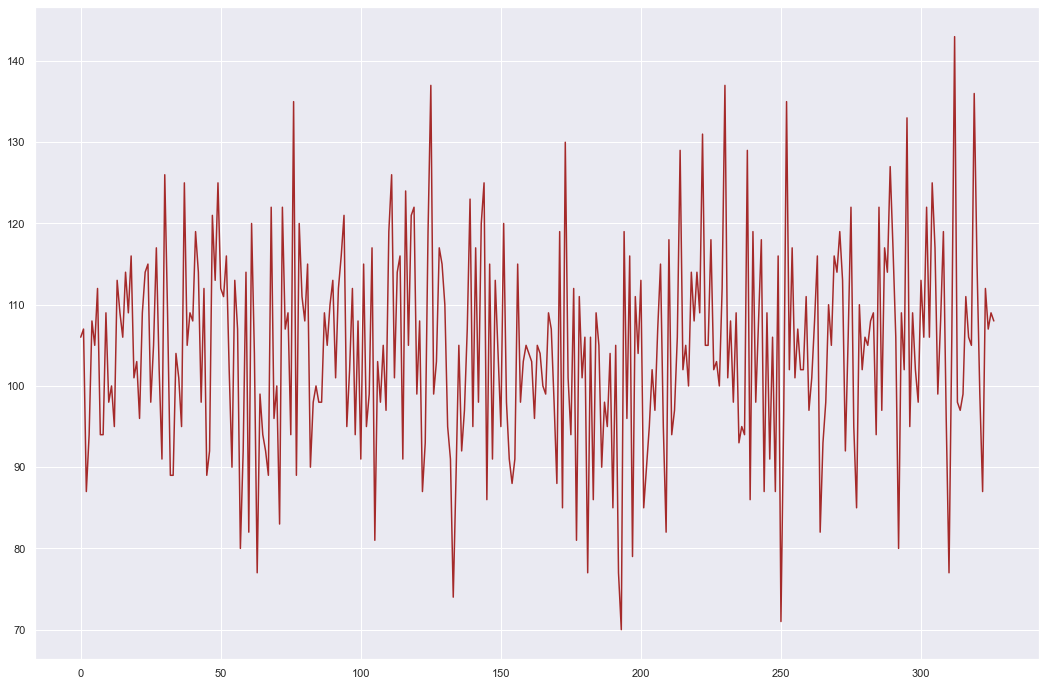

In [169]:
yTestReset = pd.DataFrame(yTest).reset_index(inplace=False,drop=True)

plt.figure(figsize=(18,12))
plt.plot(yTestReset.index,yTestReset,color="brown")
plt.show()

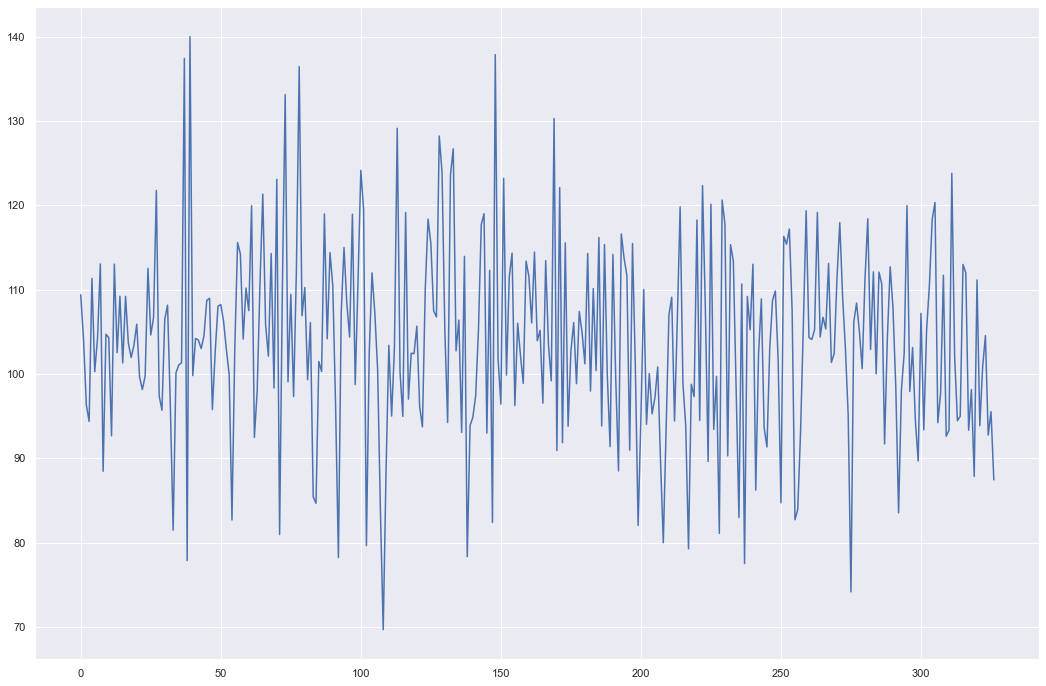

In [170]:
yPredictReset = pd.DataFrame(yPredict).reset_index(inplace=False,drop=True)

plt.figure(figsize=(18,12))
plt.plot(yPredictReset.index,yPredictReset[0])
plt.show()

### Superimpose

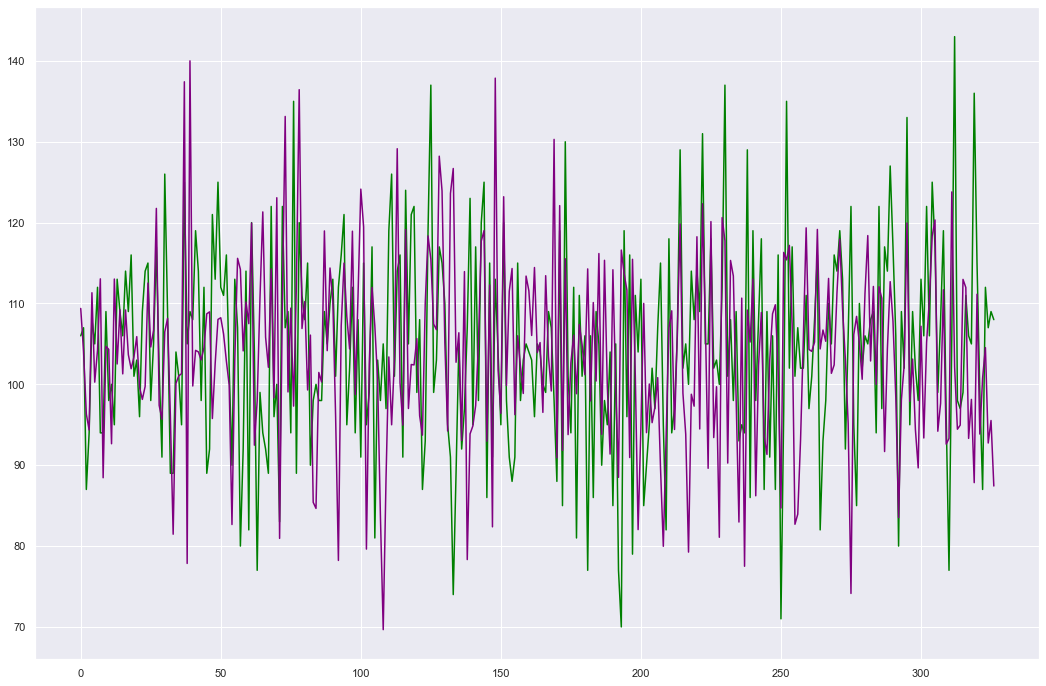

In [171]:
plt.figure(figsize=(18,12))
plt.plot(yTestReset.index,yTestReset["team1 final score"],color="green")
plt.plot(yPredictReset.index,yPredictReset[0],color="purple")
plt.show()

### Percentage off

In [172]:
convNumpyYTestReset = np.array(yTestReset)
percentOff = ((convNumpyYTestReset - yPredictReset) / (convNumpyYTestReset + 0.0001)) * 100

pd.DataFrame(percentOff).sample(51)

,0
130,4.428381
316,-0.884397
263,-2.720554
105,-32.379534
246,-13.255773
273,-12.060169
302,13.763341
234,10.041632
168,7.310251
106,2.407242


In [173]:
dfPredict["residual"] = dfPredict["yTest"] - dfPredict["yPredict"]
dfPredict["percentage difference"] = np.absolute((dfPredict["residual"] / (dfPredict["yTest"])) * 100)
dfPredict.head(45)

,yTest,yPredict,residual,percentage difference
877,106,109.386131,-3.386131,3.194463
603,107,104.084335,2.915665,2.724920
446,87,96.322845,-9.322845,10.715914
726,94,94.359009,-0.359009,0.381924
551,108,111.326981,-3.326981,3.080538
280,105,100.271011,4.728989,4.503799
168,112,104.235802,7.764198,6.932320
1220,94,113.046944,-19.046944,20.262706
1177,94,88.448112,5.551888,5.906263
273,109,104.696930,4.303070,3.947771


In [174]:
meanAbsoluteError = mean_absolute_error(yTest,yPredict)
print("mean absolute error (team1 final score): %s" % meanAbsoluteError)
meanSquaredError = mean_squared_error(yTest,yPredict)
print("mean squared error (team1 final score): %s" % meanSquaredError)

mean absolute error (team1 final score): 11.125346659155795
mean squared error (team1 final score): 209.24518904649076


### Convert to dmatrix data structure

In [175]:
dataDMatrix = xgb.DMatrix(data=dfFilterNba[features],label=dfFilterNba["team1 final score"])
dataDMatrix

In [176]:
params = {"booster": "gbtree","objective":"reg:squarederror","learning_rate": 0.9111,
    'max_depth': 6,"alpha": 1,"n_estimators": 211,"reg_lambda": 0.09999,"reg_alpha": 2.2222}

In [177]:
crossValResults = xgb.cv(dtrain=dataDMatrix,params=params,nfold=12,
    num_boost_round=25,early_stopping_rounds=10,metrics="rmse",as_pandas=True,seed=122)
crossValResults.head()

[20:49:43] WARNING: ..\src\learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:49:43] WARNING: ..\src\learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:49:43] WARNING: ..\src\learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,14.216850,0.073866,14.658781,0.706038
1,9.687622,0.117437,12.152138,0.909006


In [178]:
dtrain = xgb.DMatrix(xTrain[features],label=yTrain)
dtest = xgb.DMatrix(xTest[features],label=yTest)

In [179]:
parameter = {'max_depth': 6,'eta': 0.3333,"booster": "gbtree","verbose": True,"n_estimators": 122,"learning_rate": 0.9111,
    "objective": "reg:squarederror","alpha": 10,"reg_alpha":2.2222}
parameter["nthread"] = 4
parameter['eval_metric'] = ["auc","logloss","ams@0"]

evallist = [(dtest,"eval"),(dtrain,"train")]

In [180]:
num_round = 17
bst = xgb.train(parameter,dtrain,num_round,evallist)

[20:49:45] WARNING: ..\src\learner.cc:573: 
Parameters: { "n_estimators", "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:49:45] WARNING: ..\src\metric\auc.cc:303: Dataset contains only positive or negative samples.
[20:49:45] WARNING: ..\src\metric\auc.cc:303: Dataset contains only positive or negative samples.
[0]	eval-auc:nan	eval-logloss:-3811.44800	eval-ams@0:30.15398	train-auc:nan	train-logloss:-3793.30493	train-ams@0:61.90086
[20:49:45] WARNING: ..\src\metric\auc.cc:303: Dataset contains only positive or negative samples.
[20:49:45] WARNING: ..\src\metric\auc.cc:303: Dataset contains only positive or negative samples.
[1]	eval-auc:nan	eval-logloss:-3811.44800	eval-ams@0:41.26421	train-auc:nan	train-logloss:-3793.30493	train-ams@0:83.88902
[20:49:45] WARNIN

In [181]:
yPredict1 = bst.predict(dtest,ntree_limit=bst.best_ntree_limit)
pd.DataFrame(yPredict1).head(50)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


,0
0,108.419441
1,87.841667
2,109.453064
3,98.291252
4,108.971588
5,104.053749
6,105.434540
7,75.640694
8,102.485672
9,97.871597


### Feature importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

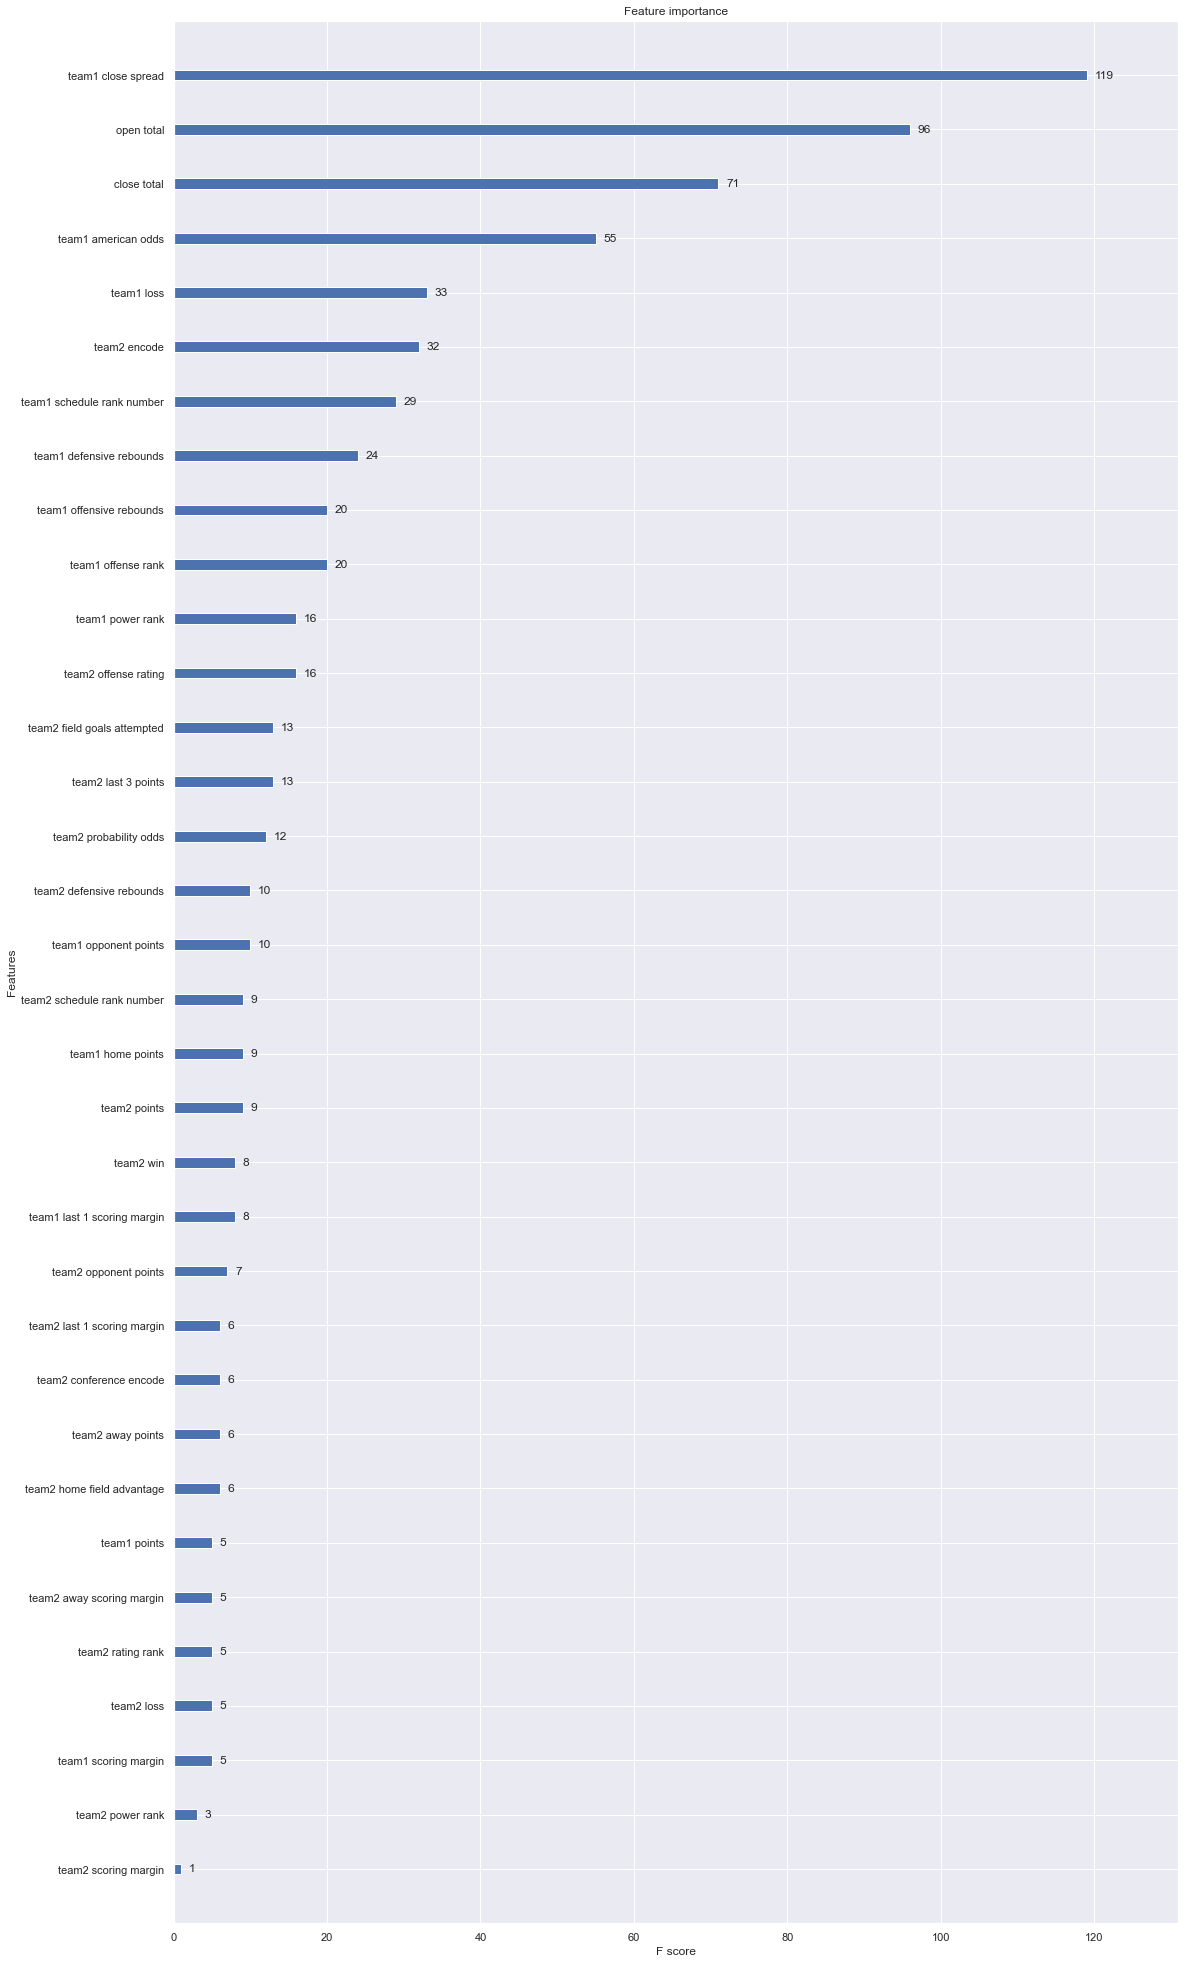

In [182]:
fig,ax = plt.subplots(1,1,figsize=(18,35))
xgb.plot_importance(bst,ax=ax)

### SHAP (shapley additive explanations)

In [183]:
treeExplainer = shap.TreeExplainer(XGBRegressor,model_output="raw",feature_perturbation="interventional",
    data=pd.DataFrame(xTest).head(100),algorithm="deep")

In [184]:
shapValues = treeExplainer.shap_values(pd.DataFrame(xTest).iloc[:327,:])
shapValues

array([[-1.16762701e+01,  1.15216720e+01,  0.00000000e+00, ...,
        -4.79616902e-01,  0.00000000e+00,  5.32673059e-03],
       [-9.57027464e+00,  1.01714979e+01,  0.00000000e+00, ...,
         5.95770822e-02,  0.00000000e+00,  5.02739778e-03],
       [-1.01484551e+01,  1.15451751e+01,  0.00000000e+00, ...,
        -3.43305968e-02,  0.00000000e+00,  4.57722443e-03],
       ...,
       [-1.18146291e+01,  1.14382817e+01,  0.00000000e+00, ...,
        -3.15866390e-02,  0.00000000e+00,  5.32673059e-03],
       [ 2.77307589e+01, -2.81154807e+01,  0.00000000e+00, ...,
         3.28860541e-01,  0.00000000e+00,  1.03617466e-02],
       [-1.15416547e+01,  1.02857687e+01,  0.00000000e+00, ...,
        -3.44573754e-02,  0.00000000e+00,  5.04284570e-03]])

In [185]:
shapValuesList = []
for i in shapValues:
    convListShapValues = i.tolist()
    shapValuesList.append(convListShapValues)
    
dfShapValues = pd.DataFrame(shapValuesList)
dfShapValues.head(55)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
0,-11.676270,11.521672,0.0,0.0,0.0,0.0,0.007966,-0.000956,0.067532,0.0,0.0,0.0,0.0,0.0,0.0,-0.003851,-0.239236,-0.058618,0.0,0.0,0.0,0.0,0.0,0.0,-0.017375,0.0,-0.049059,0.0,0.0,0.0,0.033880,0.0,0.035088,0.0,0.0,0.0,0.0,0.0,0.0,-1.176605,-0.052793,-0.479617,0.0,0.005327
1,-9.570275,10.171498,0.0,0.0,0.0,0.0,-0.002640,0.001243,0.067388,0.0,0.0,0.0,0.0,0.0,0.0,-0.024891,0.741438,-0.039426,0.0,0.0,0.0,0.0,0.0,0.0,-0.017375,0.0,-0.049059,0.0,0.0,0.0,-0.651672,0.0,-0.004785,0.0,0.0,0.0,0.0,0.0,0.0,-1.451176,-0.202400,0.059577,0.0,0.005027
2,-10.148455,11.545175,0.0,0.0,0.0,0.0,-0.002640,0.323805,0.039568,0.0,0.0,0.0,0.0,0.0,0.0,-0.001390,1.116153,-0.037229,0.0,0.0,0.0,0.0,0.0,0.0,-0.017375,0.0,-0.049059,0.0,0.0,0.0,0.016719,0.0,-0.036151,0.0,0.0,0.0,0.0,0.0,0.0,6.235633,0.468182,-0.034331,0.0,0.004577
3,-11.399984,11.352849,0.0,0.0,0.0,0.0,0.007966,0.001243,0.067388,0.0,0.0,0.0,0.0,0.0,0.0,0.015933,-0.237753,-0.058618,0.0,0.0,0.0,0.0,0.0,0.0,-0.017375,0.0,-0.049059,0.0,0.0,0.0,0.033880,0.0,-0.036151,0.0,0.0,0.0,0.0,0.0,0.0,-1.176605,-0.053193,0.033740,0.0,0.004861
4,-11.240903,10.891570,0.0,0.0,0.0,0.0,-0.002640,0.001243,0.067388,0.0,0.0,0.0,0.0,0.0,0.0,-0.074333,0.717371,-0.039426,0.0,0.0,0.0,0.0,0.0,0.0,-0.017375,0.0,-0.049059,0.0,0.0,0.0,0.033880,0.0,0.035088,0.0,0.0,0.0,0.0,0.0,0.0,-1.176601,-0.202400,0.083644,0.0,0.005027
5,2.865446,-19.032888,0.0,0.0,0.0,0.0,0.000000,-0.151906,0.031693,0.0,0.0,0.0,0.0,0.0,0.0,-0.011798,1.932182,-0.053188,0.0,0.0,0.0,0.0,0.0,0.0,-0.073754,0.0,-0.049059,0.0,0.0,0.0,-0.003096,0.0,0.018076,0.0,0.0,0.0,0.0,0.0,0.0,2.995520,-0.233158,0.133767,0.0,0.009781
6,-11.773433,11.313158,0.0,0.0,0.0,0.0,-0.002640,-0.000956,0.067532,0.0,0.0,0.0,0.0,0.0,0.0,-0.024891,0.282475,-0.039426,0.0,0.0,0.0,0.0,0.0,0.0,-0.017375,0.0,-0.049059,0.0,0.0,0.0,0.033880,0.0,-0.004785,0.0,0.0,0.0,0.0,0.0,0.0,-1.176601,-0.202591,-0.034457,0.0,0.005027
7,-11.513903,11.419562,0.0,0.0,0.0,0.0,0.007966,0.001243,0.067388,0.0,0.0,0.0,0.0,0.0,0.0,-0.003385,-0.238960,-0.058618,0.0,0.0,0.0,0.0,0.0,0.0,-0.017375,0.0,-0.049059,0.0,0.0,0.0,0.033880,0.0,0.035088,0.0,0.0,0.0,0.0,0.0,0.0,-1.176605,-0.052793,0.087892,0.0,0.004861
8,-11.403671,11.034158,0.0,0.0,0.0,0.0,-0.002640,-0.000956,0.067532,0.0,0.0,0.0,0.0,0.0,0.0,0.091829,0.696801,-0.039426,0.0,0.0,0.0,0.0,0.0,0.0,-0.017375,0.0,-0.049059,0.0,0.0,0.0,0.033880,0.0,0.147264,0.0,0.0,0.0,0.0,0.0,0.0,-1.176601,-0.202801,-0.482488,0.0,0.004562
9,-11.814654,10.816514,0.0,0.0,0.0,0.0,0.007966,-0.018122,0.039568,0.0,0.0,0.0,0.0,0.0,0.0,0.045591,-0.239232,-0.058618,0.0,0.0,0.0,0.0,0.0,0.0,-0.017375,0.0,-0.049059,0.0,0.0,0.0,0.033880,0.0,-0.004785,0.0,0.0,0.0,0.0,0.0,0.0,-4.678289,-0.052983,-0.031587,0.0,0.005330


In [186]:
shap.initjs()

In [187]:
shap.force_plot(treeExplainer.expected_value,shapValues[4],pd.DataFrame(xTest).iloc[5:6,])


In [188]:
shap.force_plot(treeExplainer.expected_value,shapValues[27],pd.DataFrame(xTest).iloc[28:29,])


In [189]:
shap.force_plot(treeExplainer.expected_value,shapValues[55],pd.DataFrame(xTest).iloc[56:57])


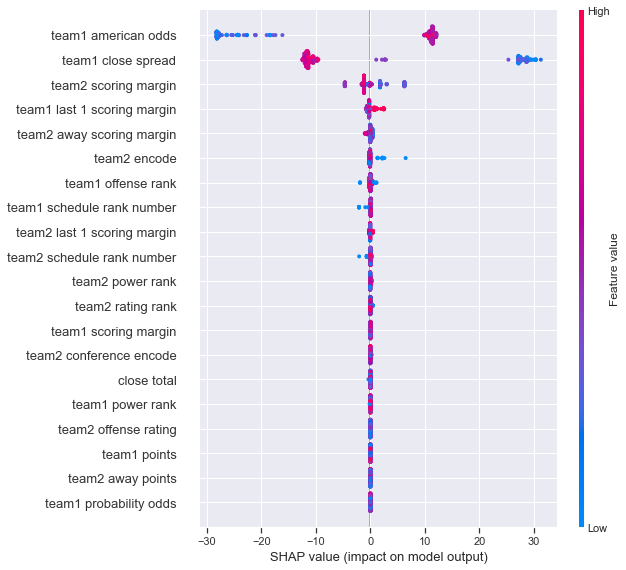

In [190]:
shap.summary_plot(shapValues,xTest[0:327])

### Compute SHAP values

In [191]:
explainer = shap.Explainer(XGBRegressor.predict,xTrain[:100])
explainShapValues = explainer(xTrain[:50])

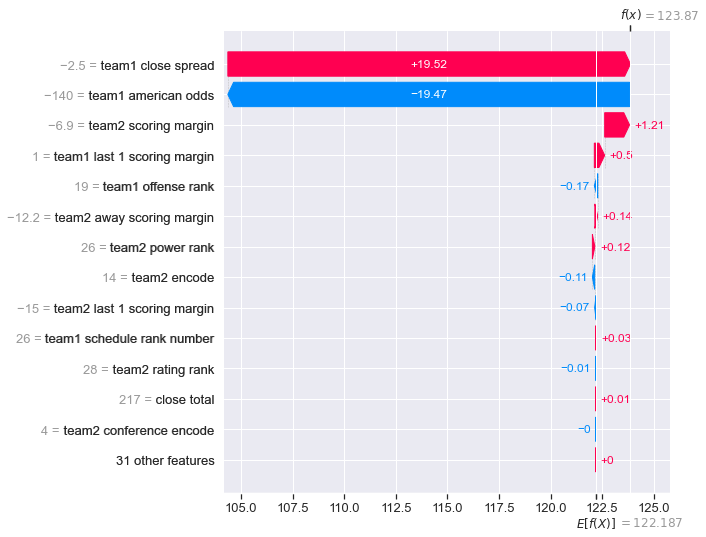

In [192]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(explainShapValues[13],max_display=14)

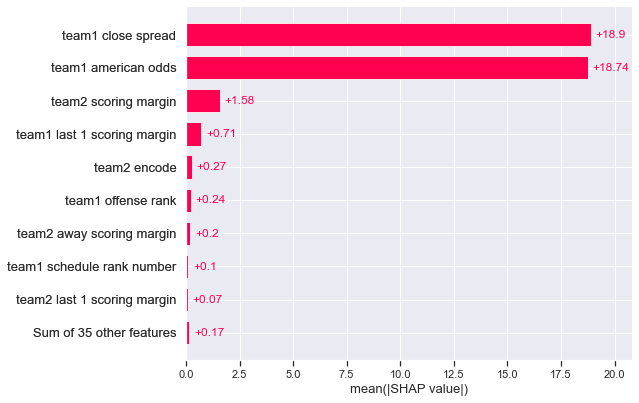

In [193]:
shap.plots.bar(explainShapValues)

### Statsmodels

In [194]:
feat = [
    # 'date',
    # 'team1',
    'team1 encode',
    # 'team1 ha',
    'team1 ha encode',
    # 'team1 1st quarter',
    # 'team1 2nd quarter',
    # 'team1 3rd quarter',
    # 'team1 4th quarter',
    # 'team1 final score',
    # 'team1 game result',
    # 'team1 game result encode',
    'team1 open spread',
    # 'team1 open spread result',
    # 'team1 open spread result encode',
    'team1 close spread',
    # 'team1 close spread result',
    # 'team1 close spread result encode',
    'team1 american odds',
    'team1 probability odds',
    'team1 decimal odds',
    'team1 fractional odds',
    'team1 win',
    'team1 loss',
    'team1 record rating',
    'team1 rating rank',
    'team1 rating rating',
    'team1 power rank',
    'team1 power rating',
    'team1 offense rank',
    'team1 offense rating',
    'team1 defense rank',
    'team1 defense rating',
    'team1 home field advantage',
    'team1 schedule rank number',
    'team1 schedule rank decimal',
    # 'team1 conference',
    'team1 conference encode',
    'team1 assists',
    'team1 defensive rebounds',
    'team1 field goals attempted',
    'team1 fouls',
    'team1 offensive rebounds',
    'team1 opponent points',
    'team1 points',
    'team1 last 3 points',
    'team1 last 1 points',
    'team1 home points',
    'team1 away points',
    'team1 scoring margin',
    'team1 last 3 scoring margin',
    'team1 last 1 scoring margin',
    'team1 home scoring margin',
    'team1 away scoring margin',
    'team1 three pointers attempted',
    # 'team2',
    'team2 encode',
    # 'team2 ha',
    'team2 ha encode',
    # 'team2 1st quarter',
    # 'team2 2nd quarter',
    # 'team2 3rd quarter',
    # 'team2 4th quarter',
    # 'team2 final score',
    # 'team2 game result',
    # 'team2 game result encode',
    'team2 open spread',
    # 'team2 open spread result',
    # 'team2 open spread result encode',
    'team2 close spread',
    # 'team2 close spread result',
    # 'team2 close spread result encode',
    'team2 american odds',
    'team2 probability odds',
    'team2 decimal odds',
    'team2 fractional odds',
    'team2 win',
    'team2 loss',
    'team2 record rating',
    'team2 rating rank',
    'team2 rating rating',
    'team2 power rank',
    'team2 power rating',
    'team2 offense rank',
    'team2 offense rating',
    'team2 defense rank',
    'team2 defense rating',
    'team2 home field advantage',
    'team2 schedule rank number',
    'team2 schedule rank decimal',
    # 'team2 conference',
    'team2 conference encode',
    'team2 assists',
    'team2 defensive rebounds',
    'team2 field goals attempted',
    'team2 fouls',
    'team2 offensive rebounds',
    'team2 opponent points',
    'team2 points',
    'team2 last 3 points',
    'team2 last 1 points',
    'team2 home points',
    'team2 away points',
    'team2 scoring margin',
    'team2 last 3 scoring margin',
    'team2 last 1 scoring margin',
    'team2 home scoring margin',
    'team2 away scoring margin',
    'team2 three pointers attempted',
    'open total',
    # 'open total result',
    # 'open total result encode',
    'close total']
    # 'close total result',
    # 'close total result encode',
    # 'year'

dropFeat = [
    # 'date',
    # 'team1',
    # 'team1 ha',
    # 'team1 1st quarter',
    # 'team1 2nd quarter',
    # 'team1 3rd quarter',
    # 'team1 4th quarter',
    # 'team1 final score',
    # 'team1 game result',
    # 'team1 game result encode',
    # 'team1 open spread result',
    # 'team1 open spread result encode',
    'team1 close spread',
    # 'team1 close spread result',
    # 'team1 close spread result encode',
    'team1 american odds',
    'team1 probability odds',
    'team1 decimal odds',
    'team1 fractional odds',
    'team1 loss',
    'team1 power rank',
    'team1 offense rank',
    'team1 schedule rank number',
    'team1 schedule rank decimal',
    # 'team1 conference',
    'team1 defensive rebounds',
    'team1 offensive rebounds',
    'team1 opponent points',
    'team1 points',
    'team1 home points',
    'team1 scoring margin',
    'team1 last 1 scoring margin',
    # 'team2',
    'team2 encode',
    # 'team2 ha',
    # 'team2 1st quarter',
    # 'team2 2nd quarter',
    # 'team2 3rd quarter',
    # 'team2 4th quarter',
    # 'team2 final score',
    # 'team2 game result',
    # 'team2 game result encode',
    # 'team2 open spread result',
    # 'team2 open spread result encode',
    'team2 close spread',
    # 'team2 close spread result',
    # 'team2 close spread result encode',
    'team2 probability odds',
    'team2 decimal odds',
    'team2 fractional odds',
    'team2 win',
    'team2 loss',
    'team2 rating rank',
    'team2 rating rating',
    'team2 power rank',
    'team2 power rating',
    'team2 offense rating',
    'team2 home field advantage',
    'team2 schedule rank number',
    'team2 schedule rank decimal',
    # 'team2 conference',
    'team2 conference encode',
    'team2 defensive rebounds',
    'team2 field goals attempted',
    'team2 opponent points',
    'team2 points',
    'team2 last 3 points',
    'team2 away points',
    'team2 scoring margin',
    'team2 last 1 scoring margin',
    'team2 away scoring margin',
    'open total',
    'close total']


In [195]:
xTrain,xTest,yTrain,yTest = train_test_split(dfFilterNba[feat],dfFilterNba["team1 final score"],test_size=0.25,\
    random_state=11)

In [198]:
xInclCons = sm.add_constant(xTrain)
# ordinary least squares
model = sm.OLS(yTrain.astype(float),xInclCons.astype(float))          
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      team1 final score   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     4.545
Date:                Fri, 21 May 2021   Prob (F-statistic):           2.40e-27
Time:                        20:50:36   Log-Likelihood:                -3685.0
No. Observations:                 979   AIC:                             7512.
Df Residuals:                     908   BIC:                             7859.
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
team1 encode                      -0.0017      0.182     -0.009      0.993      -0.359       0.356
team1 ha encode                 1.448e-09   1.08e-09      1.343      0.180   -6.67e-10    3.56e-09
team1 open spread                 -0.0360      0.129     -0.279      0.780      -0.289       0.217
team1 close spread                -0.0860      0.134     -0.641      0.521      -0.349       0.177
team1 american odds               -0.0078      0.007     -1.092      0.275      -0.022       0.006
team1 probability odds             0.3146      0.701      0.449      0.654      -1.061       1.690
team1 decimal odds              -292.7472    202.070     -1.449      0.148    -689.327     103.832
team1 fractional odds            293.8305    202.136      1.454      0.146    -102.878     690.539
team1 win                          0.3062      0.550      0.557      0.578      -0.772       1.385
team1 loss                         1.0271      1.483      0.693      0.489      -1.883       3.937
team1 record rating               -4.6392      6.626     -0.700      0.484     -17.642       8.364
team1 rating rank                 -0.2360      0.779     -0.303      0.762      -1.765       1.293
team1 rating rating               -7.3839     13.906     -0.531      0.596     -34.675      19.907
team1 power rank                   0.0469      1.099      0.043      0.966      -2.109       2.203
team1 power rating                 0.1870      2.664      0.070      0.944      -5.042       5.416
team1 offense rank                 0.2365      0.400      0.591      0.555      -0.549       1.022
team1 offense rating               0.0487      4.202      0.012      0.991      -8.197       8.295
team1 defense rank                -0.0560      0.701     -0.080      0.936      -1.432       1.320
team1 defense rating               0.0207      3.042      0.007      0.995      -5.949       5.990
team1 home field advantage        -4.5170      3.619     -1.248      0.212     -11.621       2.586
team1 schedule rank number         1.0466      1.231      0.850      0.395      -1.369       3.462
team1 schedule rank decimal       20.7423     26.092      0.795      0.427     -30.465      71.950
team1 conference encode            0.4143      1.036      0.400      0.689      -1.619       2.448
team1 assists                      0.6047      1.006      0.601      0.548      -1.369       2.579
team1 defensive rebounds           0.3378      2.053      0.165      0.869      -3.692       4.367
team1 field goals attempted        0.1287      0.648      0.199      0.843      -1.143       1.400
team1 fouls                        0.1672      0.703      0.238      0.812      -1.213       1.547
team1 offensive rebounds          -0.2644      1.065     -0.248      0.804      -2.354       1.825
team1 opponent

In [199]:
pValues = pd.DataFrame({'coefficient': results.params,'p_value': round(results.pvalues,4)})
pValues

,coefficient,p_value
team1 encode,-1.696298e-03,0.9926
team1 ha encode,1.447503e-09,0.1795
team1 open spread,-3.596718e-02,0.7803
team1 close spread,-8.597287e-02,0.5214
team1 american odds,-7.846023e-03,0.2752
team1 probability odds,3.145622e-01,0.6538
team1 decimal odds,-2.927472e+02,0.1478
team1 fractional odds,2.938305e+02,0.1464
team1 win,3.062141e-01,0.5775
team1 loss,1.027142e+00,0.4887


In [200]:
pValueSeries = pValues.p_value
pd.DataFrame(pValueSeries).head(70)

,p_value
team1 encode,0.9926
team1 ha encode,0.1795
team1 open spread,0.7803
team1 close spread,0.5214
team1 american odds,0.2752
team1 probability odds,0.6538
team1 decimal odds,0.1478
team1 fractional odds,0.1464
team1 win,0.5775
team1 loss,0.4887


### Features improvement

In [201]:
xTrain,xTest,yTrain,yTest = train_test_split(dfFilterNba[dropFeat],dfFilterNba["team1 final score"],test_size=0.25,\
    random_state=11)

In [202]:
xInclCons = sm.add_constant(xTrain)
model = sm.OLS(yTrain.astype(float),xInclCons.astype(float))   # ordinary least square
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      team1 final score   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     7.488
Date:                Fri, 21 May 2021   Prob (F-statistic):           5.51e-37
Time:                        20:50:37   Log-Likelihood:                -3687.2
No. Observations:                 979   AIC:                             7462.
Df Residuals:                     935   BIC:                             7677.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         156.9151    290.177      0.541      0.589    -412.559     726.390
team1 close spread             -0.1278      0.039     -3.295      0.001      -0.204      -0.052
team1 american odds            -0.0084      0.007     -1.208      0.227      -0.022       0.005
team1 probability odds          0.2348      0.680      0.345      0.730      -1.099       1.568
team1 decimal odds           -293.5480    196.770     -1.492      0.136    -679.710      92.614
team1 fractional odds         294.4610    196.832      1.496      0.135     -91.822     680.744
team1 loss                      0.3816      0.214      1.786      0.074      -0.038       0.801
team1 power rank               -0.0729      0.135     -0.539      0.590      -0.338       0.192
team1 offense rank              0.0851      0.129      0.659      0.510      -0.168       0.338
team1 schedule rank number      0.2131      0.320      0.666      0.506      -0.415       0.841
team1 schedule rank decimal     4.1108      6.071      0.677      0.498      -7.803      16.024
team1 defensive rebounds        0.0537      0.335      0.160      0.873      -0.604       0.711
team1 offensive rebounds       -0.1458      0.320     -0.456      0.649      -0.774       0.482
team1 opponent points           3.3118      8.417      0.393      0.694     -13.206      19.830
team1 points                   -1.2602      8.323     -0.151      0.880     -17.595      15.074
team1 home points              -1.2721      0.343     -3.712      0.000      -1.945      -0.600
team1 scoring margin            3.9744      8.319      0.478      0.633     -12.352      20.301
team1 last 1 scoring margin     0.0222      0.031      0.715      0.475      -0.039       0.083
team2 encode                    0.0370      0.069      0.534      0.594      -0.099       0.173
team2 close spread              0.1278      0.039      3.295      0.001       0.052       0.204
team2 probability odds          0.1956      0.682      0.287      0.774      -1.143       1.534
team2 decimal odds            132.4409    147.928      0.895      0.371    -157.869     422.751
team2 fractional odds        -134.4978    147.922     -0.909      0.363    -424.795     155.799
team2 win                      -0.3950      0.351     -1.124      0.261      -1.085       0.295
team2 loss                     -0.8526      0.643     -1.327      0.185      -2.114       0.409
team2 rating rank              -0.6462      0.602     -1.073      0.284      -1.828       0.536
team2 rating rating            -7.0412      6.862     -1.026      0.305     -20.507       6.425
team2 power rank                0.6906      0.650      1.063      0.288      -0.585       1.966
team2 power rating              1.2737      1.593      0.799      0.424      -1.853       4.401
team2 offen

In [203]:
pValues = pd.DataFrame({'coefficient': results.params,'p_value': round(results.pvalues,4)})
pValues

,coefficient,p_value
const,156.915145,0.5888
team1 close spread,-0.127777,0.0010
team1 american odds,-0.008361,0.2273
team1 probability odds,0.234785,0.7298
team1 decimal odds,-293.547969,0.1361
team1 fractional odds,294.461025,0.1350
team1 loss,0.381564,0.0744
team1 power rank,-0.072856,0.5900
team1 offense rank,0.085088,0.5100
team1 schedule rank number,0.213053,0.5056


### Seaborn

In [204]:
import seaborn as sns
sns.set()

### Differences between prediction and true target

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


Text(0.5, 1.0, 'Residuals')

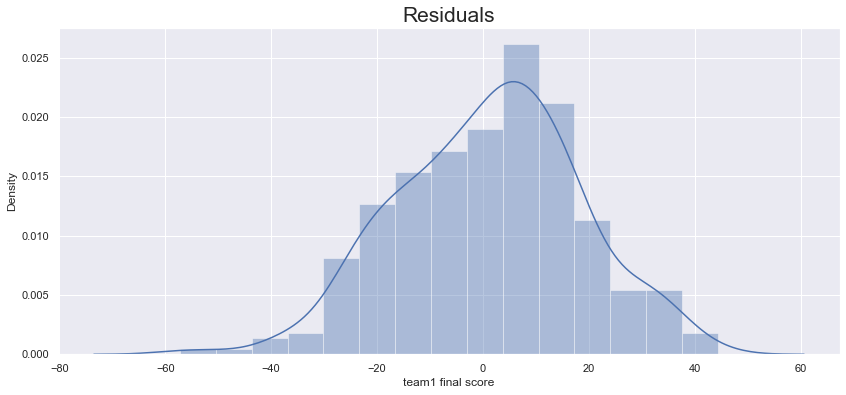

In [205]:
sns.set(rc={"figure.figsize":(14,6)})
sns.distplot(yTest - yPredict)
plt.title("Residuals",size=21)